In [31]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import BatchNormalization
import numpy as np
import matplotlib.pyplot as plt


In [32]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
 
(train_X,train_Y),(test_X,test_Y)=cifar10.load_data()
train_x=train_X.astype('float32')
test_X=test_X.astype('float32')
 
train_X=train_X/255.0
test_X=test_X/255.0

In [33]:
train_Y

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

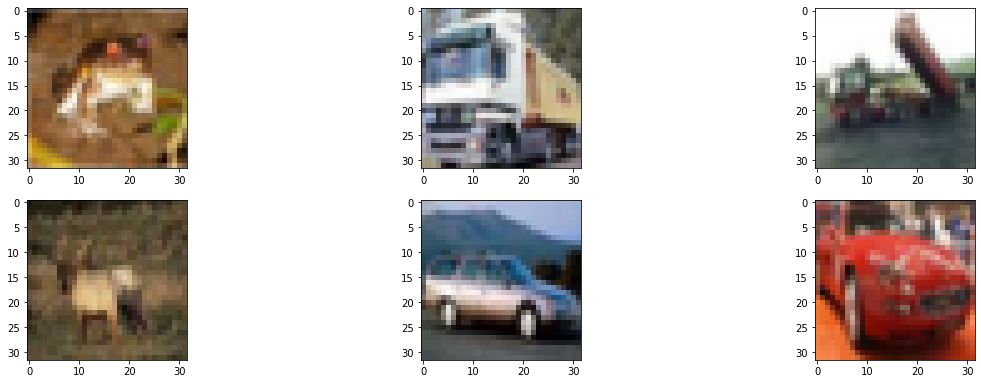

(32, 32, 3)

In [34]:
n=6
plt.figure(figsize=(20,10))
for i in range(n):
  plt.subplot(330+1+i)
  plt.imshow(train_X[i])
plt.show()
train_X[0].shape

In [35]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [36]:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
batch_size = 64
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(train_X, train_Y, batch_size)
steps_per_epoch = train_X.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(test_X,test_Y), steps_per_epoch=steps_per_epoch, epochs=100)

Epoch 1/100
781/781 [==============================] - 24s 30ms/step - loss: 1.7020 - accuracy: 0.0997 - val_loss: 1.3731 - val_accuracy: 0.0371
Epoch 2/100
635/781 [=======================>......] - ETA: 4s - loss: 1.2563 - accuracy: 0.0984

KeyboardInterrupt: ignored

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
y = model.predict(x_test).argmax(axis=1)

In [ ]:
y[101]

5

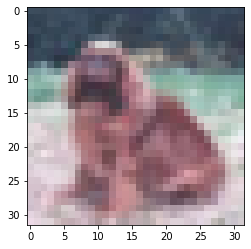

In [ ]:
plt.imshow(x_test[101])

In [ ]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()
print(labels[y_test[101]])

dog


Confusion matrix, without normalization
[[893  20  15   9   4   2  14   6  26  11]
 [  2 964   0   0   1   0   3   0   2  28]
 [ 31   2 826  13  22  20  73   6   3   4]
 [ 16   7  28 703  24  91 105   9   5  12]
 [ 10   3  30  15 842  12  79   8   1   0]
 [  2   4  17  74  27 810  40  17   0   9]
 [  1   1   7   4   2   3 980   0   1   1]
 [  9   2   8  13  31  10   9 912   1   5]
 [ 26  19   7   2   2   0   4   0 921  19]
 [  5  44   3   0   1   2   4   0   4 937]]


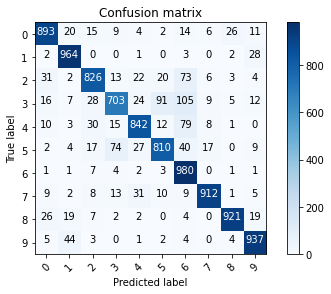

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matri

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)


In [ ]:
print('\n# Evaluate on test data')
results = model.evaluate(x_test, y_test)
print('test loss, test acc:', results)


# Evaluate on test data
313/313 [==============================] - 1s 3ms/step - loss: 0.4209 - accuracy: 0.8788
test loss, test acc: [0.4209422767162323, 0.8787999749183655]


In [ ]:
model.save("model1_cifar_10.h5")

In [ ]:
from google.colab import files
files.download('model1_cifar_10.h5')

In [38]:
import tensorflow as tf
new_model = tf.keras.models.load_model('model1_cifar_10.h5')

OSError: ignored

In [ ]:
new_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 32)        0   

In [ ]:
loss, acc = new_model.evaluate(test_X, test_Y)
print('Restored model, accuracy: {:5.2f}%'.format(100*acc))


313/313 [==============================] - 1s 3ms/step - loss: 0.4209 - accuracy: 0.8788
Restored model, accuracy: 87.88%
